# Assignment Part-I 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


# Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
# Importing dataset

data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# inspect housingInfo dataframe

print("*********************************  Info *******************************************") 
print(data.info())
print("*********************************  Shape ******************************************") 
print(data.shape)
print("**************************** Describe *****************************")
data.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle  

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# making clone of master data
df = data

# Step 2: Data Cleaning

## Null value treatment

In [6]:
# Checking for columns having null values
df.isnull().sum()[data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Null values treatment for numerical variables

In [7]:
# check for null values in all int and float columns
df.select_dtypes(include=['int','float']).isnull().sum()[df.select_dtypes(include=['int','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [8]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

In [9]:
# check the values of df['GarageYrBlt']

df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [10]:
# check the distribution of df['GarageYrBlt']

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

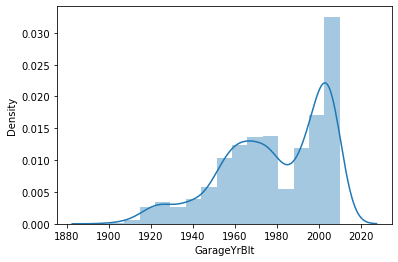

In [11]:
sns.distplot(df['GarageYrBlt'])

In [12]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [13]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['IsRemodelled'] = df.apply(checkForRemodel, axis=1)
df.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0


In [14]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['BuiltOrRemodelAge'] = df.apply(getBuiltOrRemodelAge, axis=1)
df.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,0,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,0,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,1,6
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,0,8


In [15]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(getGarageConstructionPeriod)
df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,0,8,1


In [16]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

### Removing/Imputing NaN values in Categorical attributes

In [17]:
# check for null values in all categorical columns

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### After looking null values and cross-verifying with data set and data dictionary
#### We found that only MasVnrType and Electrical is having some missing values. 
#### In rest of the columns, NA crossponds to absence of the feature not missing value.

In [18]:
#  df['Electrical'] missing values treatment

In [19]:
## As this is a single value, It will be better to remove this entry rather imputation

In [20]:
df[df['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,WD,Normal,167500,1,1,1


In [21]:
df = df.drop(labels= 1379 , axis = 0)

In [22]:
# Varifying the removal
df['Electrical'].isnull().sum()

0

In [23]:
## MasVnrType's missing values treatment

In [24]:
df['MasVnrType'].value_counts()

None       863
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

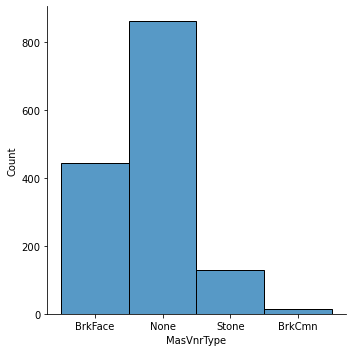

In [25]:
sns.displot(df['MasVnrType'])

In [26]:
# As there are 8 missing values, we will replace these with most frequent value
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace = True)

In [27]:
# again check for missing values
df['MasVnrType'].isnull().sum()

0

In [28]:
# again check for null values in all categorical columns
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Alley           1368
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      689
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1178
MiscFeature     1405
dtype: int64

In [29]:
# As data dictionary tells, All of above categorical variables's NA values represents absence of feature. So we will replace these NA with None.
None_cols = df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0].index


In [30]:
for col in None_cols:
    df[col]=df[col].fillna('None')

In [31]:
# again check for null values in all categorical columns
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

## Remove unwanted columns

In [32]:
# Removing id column as it is irrelavent for prdicting sale price
df.drop('Id', axis = 1, inplace = True)

## Remove highly skewed data

### Remove numerical attributes that have more than 85% data associated to one value.
- We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value

In [33]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = df.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
print(columnsToBeRemoved)
df.drop(columnsToBeRemoved, axis = 1, inplace = True)

#housingInfo.drop(['MoSold'], axis = 1, inplace = True)
df.head()

['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,2,WD,Normal,208500,0,5,1
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,None,5,WD,Normal,181500,0,31,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,None,9,WD,Normal,223500,1,6,1
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,None,2,WD,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,None,12,WD,Normal,250000,0,8,1


### Remove categorical attributes that have more than 85% data associated to one value.
- We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value

In [34]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = df.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

df.drop(columnsToBeRemoved, axis = 1, inplace = True)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,548,0,61,None,2,Normal,208500,0,5,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,460,298,0,None,5,Normal,181500,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,608,0,42,None,9,Normal,223500,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,642,0,35,None,2,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,836,192,84,None,12,Normal,250000,0,8,1


In [35]:
# check for percentage of null values in each column

percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0
GarageArea           0.0


## Check for Duplicates

In [36]:
# Check if there are any duplicate values in the dataset

df[df.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


## Outlier Treatment

In [37]:
# Checking outliers at 25%,50%,75%,90%,95% and above

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,69.861549,10517.363948,6.100069,5.575737,103.187800,443.943797,567.366004,1057.891021,1162.906785,...,0.613434,1.766964,473.030158,94.240576,46.692255,6.322824,180930.394791,0.476354,22.965045,0.274846
std,42.310746,22.035077,9984.666267,1.383171,1.113079,180.773158,456.106417,441.992392,438.500975,386.572089,...,0.644687,0.747546,213.869604,125.381679,66.267472,2.704331,79468.964025,0.499612,20.639721,0.446590
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7549.000000,5.000000,5.000000,0.000000,0.000000,223.000000,796.000000,882.000000,...,0.000000,1.000000,333.000000,0.000000,0.000000,5.000000,129950.000000,0.000000,4.000000,0.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,0.000000,384.000000,479.000000,992.000000,1088.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,6.000000,163000.000000,0.000000,14.000000,0.000000
75%,70.000000,79.000000,11603.000000,7.000000,6.000000,164.500000,712.500000,808.000000,1298.500000,1391.500000,...,1.000000,2.000000,576.000000,168.000000,68.000000,8.000000,214000.000000,1.000000,41.000000,1.000000
90%,120.000000,92.000000,14388.400000,8.000000,7.000000,335.000000,1066.000000,1232.000000,1602.400000,1680.000000,...,1.000000,3.000000,757.200000,262.000000,130.000000,10.000000,278000.000000,1.000000,56.000000,1.000000
95%,160.000000,104.000000,17402.300000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.500000,...,2.000000,3.000000,850.200000,335.000000,175.100000,11.000000,326200.000000,1.000000,58.000000,1.000000
99%,190.000000,137.420000,37593.680000,10.000000,9.000000,791.360000,1572.420000,1797.100000,2155.100000,2219.520000,...,2.000000,3.000000,1002.980000,505.520000,285.840000,12.000000,442629.620000,1.000000,60.000000,1.000000


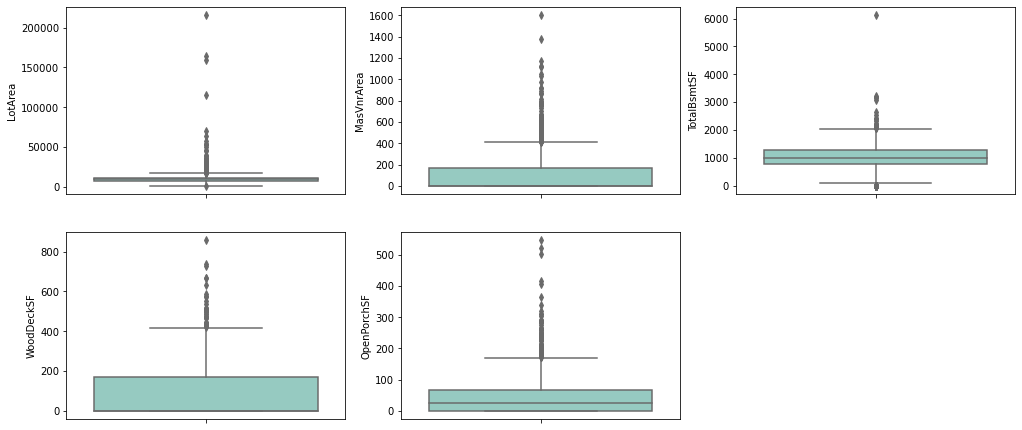

In [38]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = df)
plt.show()

In [39]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = df['MasVnrArea'].quantile(0.98)
df = df[df["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < nn_quartile_OpenPorchSF]

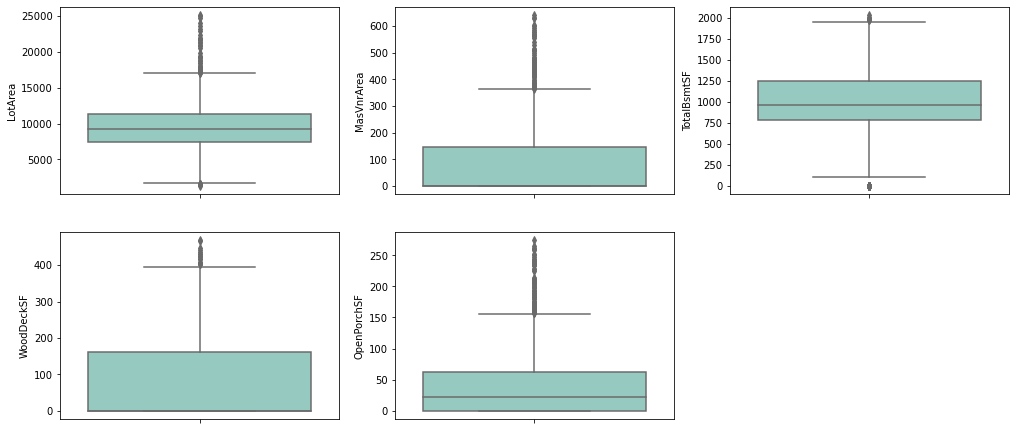

In [40]:
# again check for outliers
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = df)
plt.show()

In [41]:
# Determine the percentage of data retained

num_data = round(100*(len(df)/1460),2)
print(num_data)

93.01


# Step 3 : Data Visualization

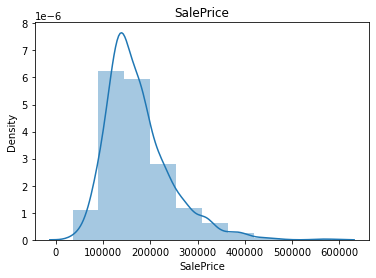

In [42]:
# Visualise the target variable
plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

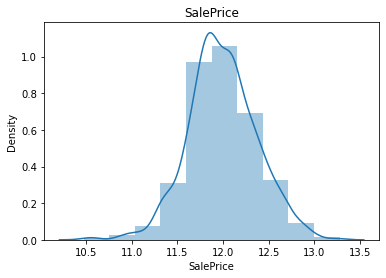

In [43]:
# As output variable seems skewed, so we will apply log transforming the sales price

df['SalePrice'] = np.log1p(df['SalePrice'])

plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

<Figure size 720x360 with 0 Axes>

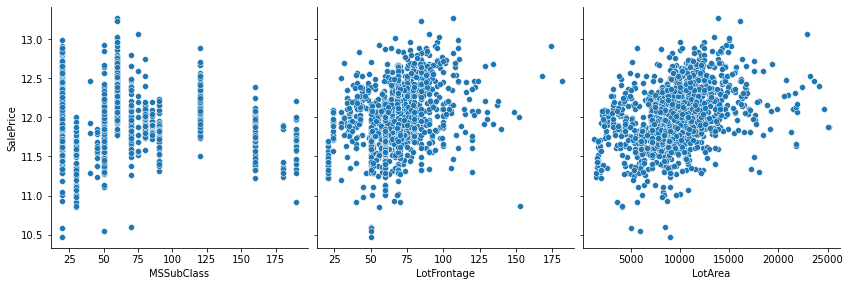

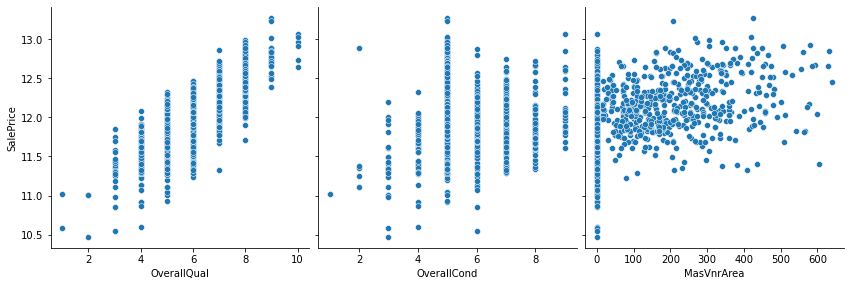

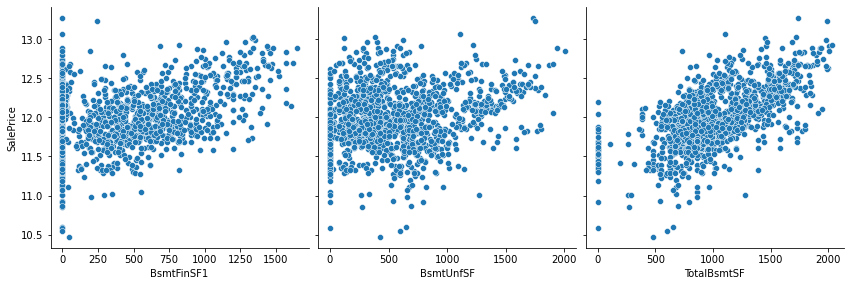

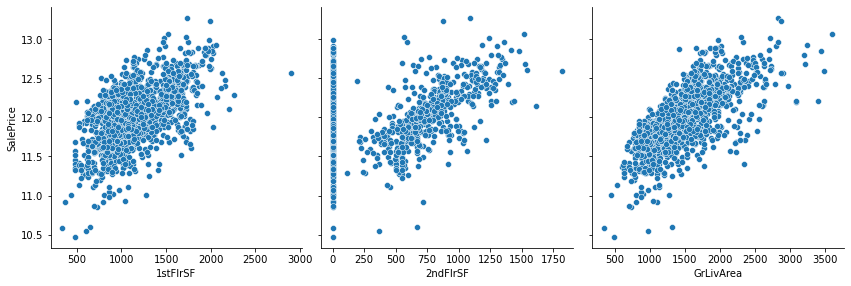

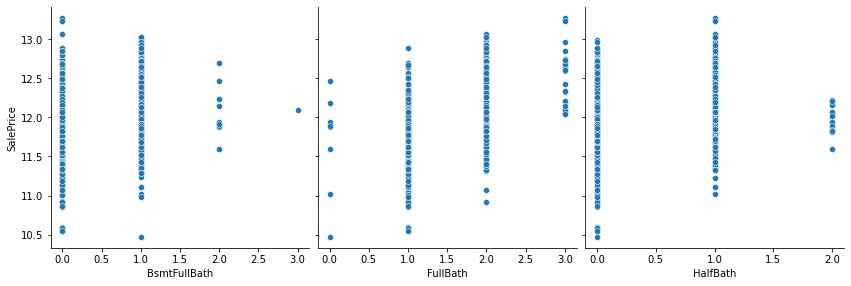

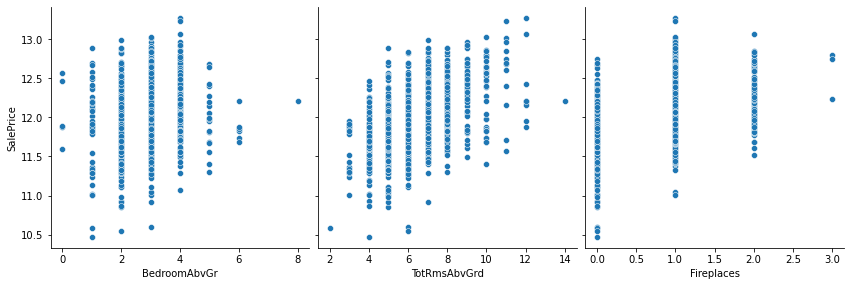

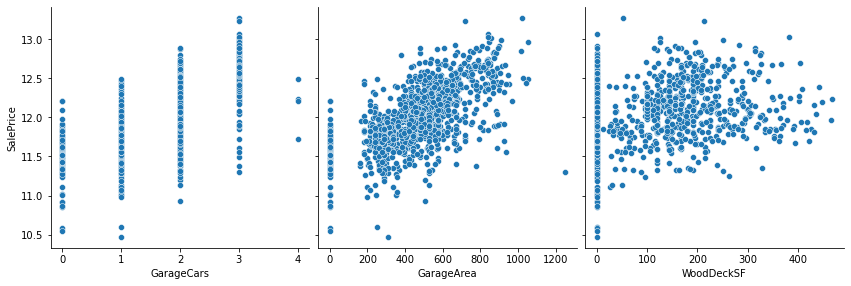

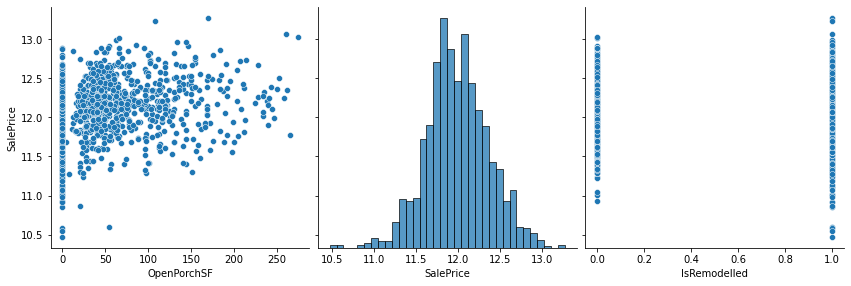

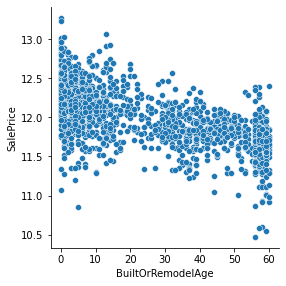

In [44]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

## Observations :

- 1stFlrSF, GrLivArea seems to be showing correlation towards right
- Rest of the variables are too scattered and hence can be understood during further analysis

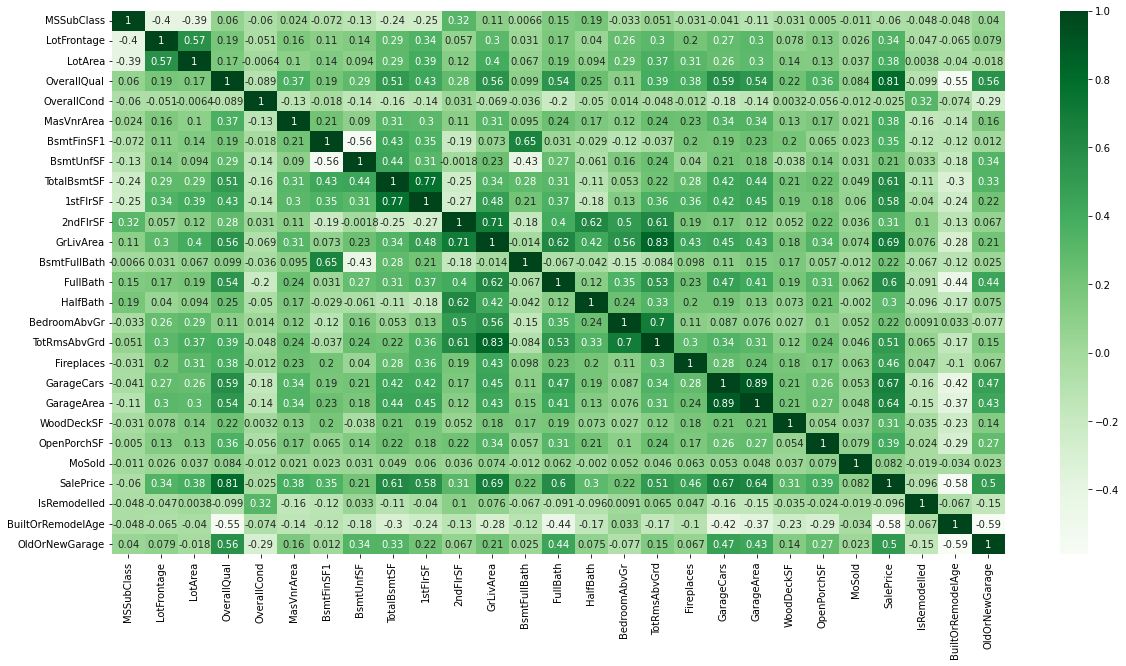

In [45]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap="Greens")
plt.show()

### Removing following columns which shows high correlation
- TotRmsAbvGrd and GrLivArea show 82%
- Garage Area and Garage Cars show 88%

In [46]:
# Removing the highly correlated variables

df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [47]:
# Check the shape of the dataframe

df.shape

(1358, 47)

In [48]:
# check for null values in all int and float columns
df.select_dtypes(include=['int','float']).isnull().sum()[df.select_dtypes(include=['int','float']).isnull().sum()>0]

Series([], dtype: int64)

# Step 4: Data Preparation
- Converting categorical data into numercal data
- Creating Dummies

## Converting categorical data into numercal data

### Handling Ordinal Categorical data

In [49]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

df['ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,                                                             'None': 0})
df['HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageCars,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,2,0,61,None,2,Normal,12.247699,0,5,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,2,298,0,None,5,Normal,12.109016,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,2,0,42,None,9,Normal,12.317171,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,3,0,35,None,2,Abnorml,11.849405,1,36,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,3,192,84,None,12,Normal,12.429220,0,8,1


### Handling Nominal Categorical data

In [50]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,4,4,1,6,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,3,4,4,5,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,4,4,2,6,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,3,3,1,5,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,4,4,3,6,...,0,0,0,0,1,0,0,0,1,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 136 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(30), uint8(103)
memory usage: 497.3 KB


In [52]:
# converting uint8 and int64 columns to float64
df = df.astype('float64')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 136 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(136)
memory usage: 1.4 MB


# Step 5: Data Prepration

In [54]:
# Putting all feature variable to X

X = df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,196.0,4.0,4.0,1.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,0.0,3.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,162.0,4.0,4.0,2.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,0.0,3.0,3.0,1.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,350.0,4.0,4.0,3.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [55]:
# Putting response variable to y

y = df['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

## Scaling data

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [57]:
# scaling input data
X[X.columns] = scaler.fit_transform(X[X.columns])
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,GarageType_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.273292,0.300483,0.666667,0.500,0.306250,0.666667,0.8,0.25,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.366460,0.348813,0.555556,0.875,0.000000,0.333333,0.8,1.00,0.833333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.291925,0.418155,0.666667,0.500,0.253125,0.666667,0.8,0.50,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.242236,0.346711,0.666667,0.500,0.000000,0.333333,0.6,0.25,0.833333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.391304,0.544652,0.777778,0.500,0.546875,0.666667,0.8,0.75,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.000000,0.254658,0.260559,0.666667,0.500,0.000000,0.666667,0.8,0.25,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1455,0.235294,0.254658,0.278084,0.555556,0.500,0.000000,0.333333,0.8,0.25,0.166667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,0.000000,0.397516,0.499054,0.555556,0.625,0.185938,0.333333,0.8,0.25,0.833333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.294118,0.279503,0.325362,0.666667,1.000,0.000000,1.000000,0.6,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
# scaling output variable
y_temp = y.to_frame() 
y_temp = scaler.fit_transform(y_temp)

In [59]:
#.flatten is used to convert 2d numpy array to 1d
y = pd.Series(y_temp.flatten())
y

0       0.633315
1       0.583854
2       0.658092
3       0.491262
4       0.698055
          ...   
1353    0.590666
1354    0.570847
1355    0.635872
1356    0.720850
1357    0.496635
Length: 1358, dtype: float64

## Train Test Split

In [60]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

# Step 6: Model Building and Evaluation

## Ridge Regression

In [61]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
13,2.0,-0.026836,-0.031170,1
12,1.0,-0.026365,-0.031203,2
11,0.9,-0.026312,-0.031220,3
10,0.8,-0.026255,-0.031240,4
9,0.7,-0.026196,-0.031268,5
14,3.0,-0.027239,-0.031274,6
8,0.6,-0.026135,-0.031306,7
7,0.5,-0.026072,-0.031358,8
6,0.4,-0.026005,-0.031431,9
15,4.0,-0.027620,-0.031446,10


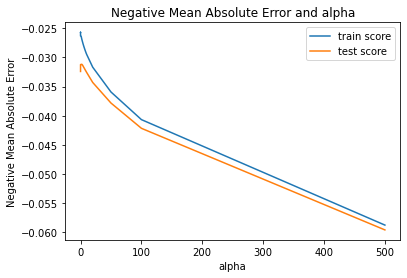

In [63]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [64]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=2.0)

In [65]:
# check the coefficient values with lambda = 2.0

alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.42913324e-02,  1.13697882e-02,  5.29272856e-02,  1.35675352e-01,
        9.98168306e-02,  6.49425402e-03,  1.21094058e-02,  1.39488095e-02,
        2.00472656e-02,  1.00041713e-02,  4.61587193e-02,  6.49619652e-03,
        8.31601945e-02,  2.54426641e-02,  8.67292451e-02,  5.99284111e-02,
        1.11250046e-01,  2.30525213e-02,  3.79866692e-02,  3.19156575e-02,
        6.99664045e-03,  2.94207948e-02,  2.58850336e-02,  1.02306087e-02,
        1.07279476e-02,  5.28282057e-02,  1.62074886e-02,  1.28123754e-02,
       -1.71397374e-04, -7.66236822e-03, -2.41435310e-02,  7.93569948e-03,
        4.53341658e-02,  3.46776991e-02,  3.95982493e-02,  3.21956998e-02,
        8.57136693e-03, -1.47717323e-02, -4.70316225e-05,  1.06838246e-02,
       -1.21219066e-02, -8.74403691e-03,  7.99914372e-04, -4.09260714e-03,
       -9.56269347e-03, -3.01286000e-03,  1.23058443e-02, -3.92843611e-03,
        4.62168107e-02, -2.44758384e-02, -1.12169248e-02, -3.10726640e-02,
       -3.30838273e-02, -

In [66]:
from sklearn.metrics import r2_score, mean_squared_error

In [67]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score on training set")
print(str(r2_train_lr) + "\n")
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score on test set")
print(str(r2_test_lr) + "\n")
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on train set")
print(str(rss1_lr) + "\n")
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on test set")
print(str(rss2_lr) + "\n")
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE on train set")
print(str(mse_train_lr) + "\n")
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE on test set")
print(str(mse_test_lr) + "\n")
metric2.append(mse_test_lr**0.5)

R2 score on training set
0.9229549142532097

R2 score on test set
0.9045961878781494

RSS on train set
1.3072827751061942

RSS on test set
0.7025793448947621

MSE on train set
0.0013760871316907308

MSE on test set
0.0017220081982714758



In [68]:
# Put the Features and coefficienst in a dataframe
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0243
1,LotFrontage,0.0114
2,LotArea,0.0529
3,OverallQual,0.1357
4,OverallCond,0.0998
...,...,...
130,SaleCondition_AdjLand,0.0277
131,SaleCondition_Alloca,0.0055
132,SaleCondition_Family,-0.0153
133,SaleCondition_Normal,0.0143


In [69]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0243,
 'LotFrontage': 0.0114,
 'LotArea': 0.0529,
 'OverallQual': 0.1357,
 'OverallCond': 0.0998,
 'MasVnrArea': 0.0065,
 'ExterQual': 0.0121,
 'BsmtQual': 0.0139,
 'BsmtExposure': 0.02,
 'BsmtFinType1': 0.01,
 'BsmtFinSF1': 0.0462,
 'BsmtUnfSF': 0.0065,
 'TotalBsmtSF': 0.0832,
 'HeatingQC': 0.0254,
 '1stFlrSF': 0.0867,
 '2ndFlrSF': 0.0599,
 'GrLivArea': 0.1113,
 'BsmtFullBath': 0.0231,
 'FullBath': 0.038,
 'HalfBath': 0.0319,
 'BedroomAbvGr': 0.007,
 'KitchenQual': 0.0294,
 'Fireplaces': 0.0259,
 'FireplaceQu': 0.0102,
 'GarageFinish': 0.0107,
 'GarageCars': 0.0528,
 'WoodDeckSF': 0.0162,
 'OpenPorchSF': 0.0128,
 'MoSold': -0.0002,
 'IsRemodelled': -0.0077,
 'BuiltOrRemodelAge': -0.0241,
 'OldOrNewGarage': 0.0079,
 'MSZoning_FV': 0.0453,
 'MSZoning_RH': 0.0347,
 'MSZoning_RL': 0.0396,
 'MSZoning_RM': 0.0322,
 'LotShape_IR2': 0.0086,
 'LotShape_IR3': -0.0148,
 'LotShape_Reg': -0.0,
 'LotConfig_CulDSac': 0.0107,
 'LotConfig_FR2': -0.0121,
 'LotConfig_FR3': -0.0087,
 'L

### RFE

In [70]:
# Do an RFE to minimise the features to 10
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 10)            
rfe = rfe.fit(X_train_ridge, y_train)

In [71]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
0,OverallQual,True,1,0.1357
4,GrLivArea,True,1,0.1113
1,OverallCond,True,1,0.0998
3,TotalBsmtSF,True,1,0.0832
5,GarageCars,True,1,0.0528
6,MSZoning_FV,True,1,0.0453
7,MSZoning_RL,True,1,0.0396
9,Foundation_Slab,True,1,0.0328
2,BsmtQual,True,1,0.0139
8,Exterior1st_BrkComm,True,1,-0.0380


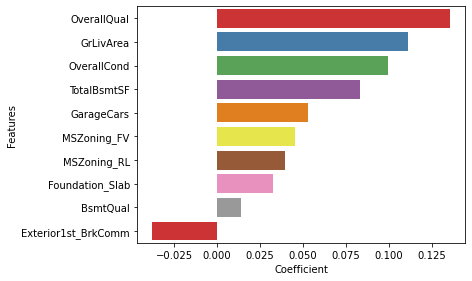

In [72]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

## Conclusion (Ridge Regression):

### According to the Ridge Regression model top 5 features which affect the price of the houses are:
- OverallQual(0.1357): Rates the overall material and finish of the house
- GrLivArea  (0.1113): Above grade (ground) living area square feet
- OverallCond(0.0998): Rates the overall condition of the house
- TotalBsmtSF(0.0832): Total square feet of basement area
- GarageCars (0.0528): Size of garage in car capacity

## Lasso Regression

In [73]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.027874,-0.030724,1
0,0.0001,-0.027081,-0.030778,2
2,0.0003,-0.028428,-0.030853,3
3,0.0004,-0.028881,-0.031000,4
4,0.0005,-0.029313,-0.031306,5
5,0.001,-0.031642,-0.033421,6
6,0.002,-0.036077,-0.037282,7
7,0.003,-0.039324,-0.040328,8
8,0.004,-0.043267,-0.044388,9
9,0.005,-0.048016,-0.049429,10


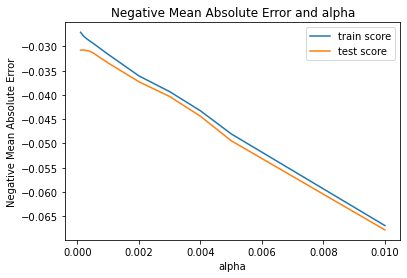

In [75]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [76]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [77]:
# check the coefficient values with lambda = 0.0002

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-1.82660392e-02,  0.00000000e+00,  4.53078657e-02,  1.87309243e-01,
        1.07027609e-01,  4.07108103e-03,  9.30256654e-03,  0.00000000e+00,
        1.78393614e-02,  9.11587955e-03,  5.00615696e-02, -0.00000000e+00,
        7.93969691e-02,  2.31695821e-02,  0.00000000e+00,  0.00000000e+00,
        2.57212246e-01,  1.13172843e-02,  1.54430994e-02,  2.32787272e-02,
        0.00000000e+00,  2.35695526e-02,  1.64519859e-02,  1.36107161e-02,
        1.22769853e-02,  5.97231200e-02,  1.45683617e-02,  1.05092843e-02,
        0.00000000e+00, -7.45087897e-03, -2.32793066e-02,  5.54762582e-03,
        2.85282978e-02,  0.00000000e+00,  1.63051831e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -1.13992126e-03,  8.78406467e-03,
       -2.39870716e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.69577667e-03,  0.00000000e+00,
        4.10917848e-02, -1.38906684e-02, -1.33531642e-03, -2.24208217e-02,
       -2.96960968e-03, -

In [78]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score on training set")
print(str(r2_train_lr) + "\n")
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score on test set")
print(str(r2_test_lr) + "\n")
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on train set")
print(str(rss1_lr) + "\n")
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on test set")
print(str(rss2_lr) + "\n")
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE on train set")
print(str(mse_train_lr) + "\n")
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE on test set")
print(str(mse_test_lr) + "\n")
metric3.append(mse_test_lr**0.5)

R2 score on training set
0.9155661963645096

R2 score on test set
0.9088014737451383

RSS on train set
1.432652791018196

RSS on test set
0.6716104881602887

MSE on train set
0.001508055569492838

MSE on test set
0.0016461041376477665



In [79]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0183
1,LotArea,0.0453
2,OverallQual,0.1873
3,OverallCond,0.1070
4,MasVnrArea,0.0041
...,...,...
62,GarageType_None,-0.0062
63,Fence_MnPrv,-0.0001
64,SaleCondition_Family,-0.0048
65,SaleCondition_Normal,0.0159


In [80]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.018266039159652494,
 'LotFrontage': 0.0,
 'LotArea': 0.04530786565188752,
 'OverallQual': 0.18730924311195818,
 'OverallCond': 0.10702760903142282,
 'MasVnrArea': 0.004071081033027541,
 'ExterQual': 0.009302566538019637,
 'BsmtQual': 0.0,
 'BsmtExposure': 0.017839361426583943,
 'BsmtFinType1': 0.009115879546383345,
 'BsmtFinSF1': 0.050061569584589134,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.07939696905444486,
 'HeatingQC': 0.023169582067745945,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 'GrLivArea': 0.2572122459683868,
 'BsmtFullBath': 0.011317284306327058,
 'FullBath': 0.015443099434792218,
 'HalfBath': 0.023278727159560815,
 'BedroomAbvGr': 0.0,
 'KitchenQual': 0.023569552578349154,
 'Fireplaces': 0.016451985871774034,
 'FireplaceQu': 0.013610716102871824,
 'GarageFinish': 0.012276985320368448,
 'GarageCars': 0.05972312002816238,
 'WoodDeckSF': 0.014568361709419648,
 'OpenPorchSF': 0.010509284306588214,
 'MoSold': 0.0,
 'IsRemodelled': -0.007450878968738562,
 'BuiltOrRemode

### RFE

In [81]:
# Do an RFE to minimise the features to 10

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 10)            
rfe = rfe.fit(X_train_lasso, y_train)

In [82]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
7,GrLivArea,True,1,0.257212
1,OverallQual,True,1,0.187309
2,OverallCond,True,1,0.107028
5,TotalBsmtSF,True,1,0.079397
8,GarageCars,True,1,0.059723
4,BsmtFinSF1,True,1,0.050062
0,LotArea,True,1,0.045308
6,HeatingQC,True,1,0.023170
3,ExterQual,True,1,0.009303
9,Neighborhood_IDOTRR,True,1,-0.022421


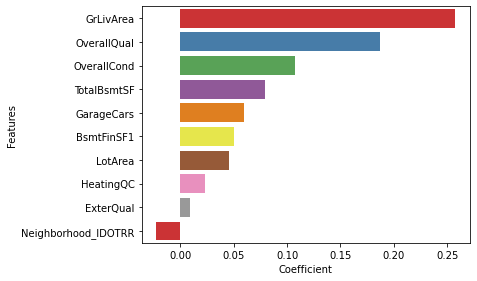

In [83]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

## Conclusion (Lasso Regression):

### According to the Lasso Regression model top 5 features which affect the price of the houses are:
- GrLivArea (0.257212): Above grade (ground) living area square feet
- OverallQual  (0.187309): Rates the overall material and finish of the house
- OverallCond(0.107028): Rates the overall condition of the house
- TotalBsmtSF(0.079397): Total square feet of basement area
- GarageCars (0.059723): Size of garage in car capacity

# Step 7: Final Conclusion

## We got a decent score for both Ridge and Lasso regression.
- Ridge : Train :0.92 Test : 0.90
- Lasso : Train : 0.90 Test : 0.91

- Optimal Value of lamda for ridge : 2
- Optimal Value of lamda for Lasso : 0.002
## Both model gave decent value of R2 Score on test data. Because of  Feature selection property of Lasso we can choose Lasso regression in this case to predict the saleprice.